# 18 — Legends & Colorbars (Professional Control)

## Goal
Create clean legends and informative colorbars for multi-series and mapped-color plots.

### What you'll learn
- Legend placement and formatting
- Multiple legends in one axes
- Custom legend handles
- Colorbar creation for scatter/heatmaps
- Colorbar ticks, labels, and normalization


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Legend Basics

```python
ax.plot(x, y, label='Series A')
ax.legend()
```

### Useful options
```python
ax.legend(loc='upper left',
          ncol=2,
          frameon=False,
          title='Legend')
```

### Outside the plot
```python
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
```


=== LEGEND FORMATTING ===


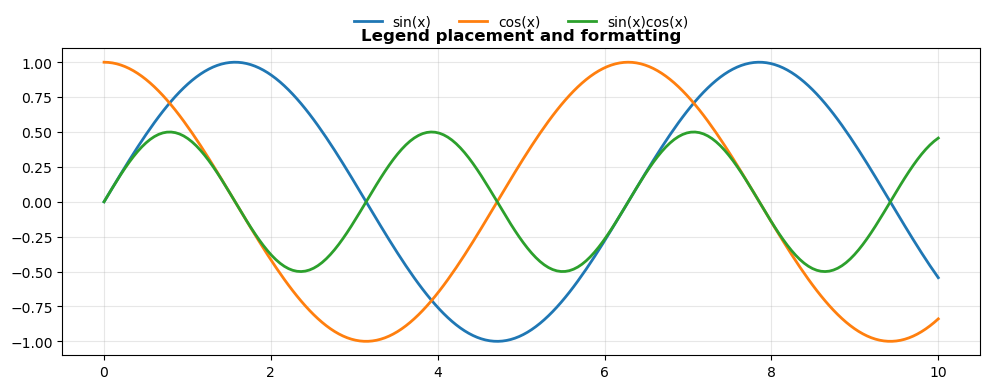

In [2]:
print('=== LEGEND FORMATTING ===')
x = np.linspace(0, 10, 200)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, np.sin(x), label='sin(x)', lw=2)
ax.plot(x, np.cos(x), label='cos(x)', lw=2)
ax.plot(x, np.sin(x)*np.cos(x), label='sin(x)cos(x)', lw=2)
ax.set_title('Legend placement and formatting', fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(ncol=3, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15))
plt.tight_layout()
plt.show()

## 2. Multiple Legends

Sometimes you need a legend for markers *and* a separate legend for lines. Create one legend, add it to axes, then create another.

```python
leg1 = ax.legend(handles=..., loc=...)
ax.add_artist(leg1)
ax.legend(handles=..., loc=...)
```


=== MULTIPLE LEGENDS ===


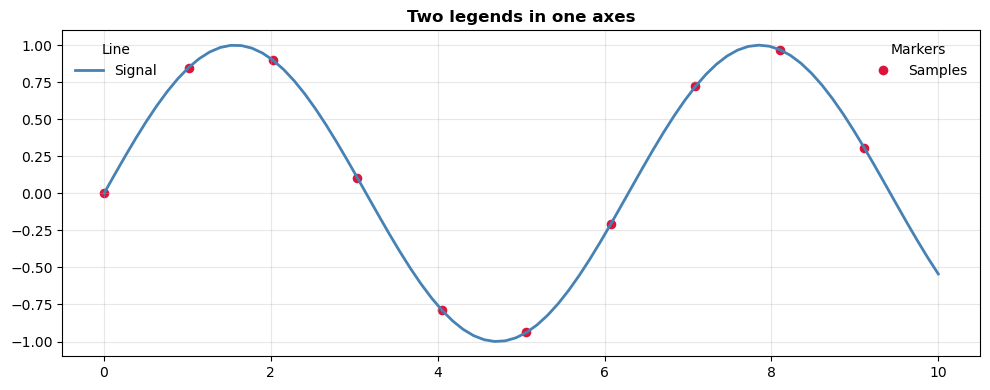

In [3]:
print('=== MULTIPLE LEGENDS ===')
x = np.linspace(0, 10, 80)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, color='steelblue', lw=2, label='Signal')
ax.scatter(x[::8], y[::8], color='crimson', s=35, label='Samples')
ax.grid(True, alpha=0.3)

line_handle = [Line2D([0], [0], color='steelblue', lw=2, label='Signal')]
pt_handle = [Line2D([0], [0], marker='o', color='w', markerfacecolor='crimson', markersize=8, label='Samples')]

leg1 = ax.legend(handles=line_handle, loc='upper left', frameon=False, title='Line')
ax.add_artist(leg1)
ax.legend(handles=pt_handle, loc='upper right', frameon=False, title='Markers')

ax.set_title('Two legends in one axes', fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Colorbars (Scatter & Heatmaps)
A colorbar should always have a label when it represents a physical quantity.

```python
sc = ax.scatter(x, y, c=z, cmap='viridis')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('z value')
```

### Control ticks
```python
cbar.set_ticks([0, 0.5, 1.0])
cbar.ax.set_yticklabels(['low', 'mid', 'high'])
```


=== COLORBAR CUSTOMIZATION (SCATTER) ===


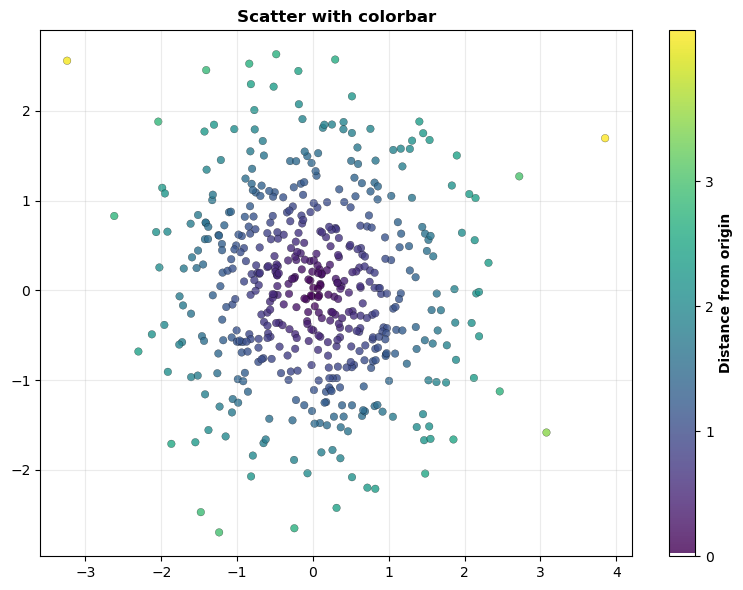

In [4]:
print('=== COLORBAR CUSTOMIZATION (SCATTER) ===')
n = 500
x = np.random.randn(n)
y = np.random.randn(n)
z = np.sqrt(x**2 + y**2)

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=z, cmap='viridis', s=30, alpha=0.8, edgecolor='k', linewidth=0.2)
ax.set_title('Scatter with colorbar', fontweight='bold')
ax.grid(True, alpha=0.25)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Distance from origin', fontweight='bold')
cbar.set_ticks([0, 1, 2, 3])
plt.tight_layout()
plt.show()

## Practice + Quick Reference

### Practice
1. Put a 3-column legend above a plot (outside).
2. Create two legends (line legend + marker legend).
3. Add a colorbar with custom ticks and a meaningful label.

### Quick reference
```python
ax.legend(ncol=2, frameon=False)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
cbar = plt.colorbar(mappable, ax=ax)
cbar.set_label('units')
```
